In [7]:
import gurobi_manager

gurobi_manager.options = {
    'WLSACCESSID': '023dd6c9-cfb8-4f1b-a33c-77f3682d6631',
    'WLSSECRET': 'd7d09c3c-39c0-42dd-9f4d-4fae36615968',
    'LICENSEID': 2589125
}


In [19]:
import networkx as nx
from torch import tensor

from graph import create_graph

n = 20
# incidence_matriz = tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#           0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
#           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
#           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
#           2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
#           2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
#           2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
#           3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
#           3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
#           4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
#           4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
#           4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
#           5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
#           5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
#           5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
#           6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
#           6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
#           7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
#           7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
#           8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#           8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#           8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
#           9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
#           9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
#          10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#          10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#          10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
#          11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
#          11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
#          12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
#          12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
#          12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
#          13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
#          13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
#          14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
#          14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
#          15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
#          15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
#          15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
#          16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
#          16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
#          16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
#          17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
#          17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
#          18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
#          18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19,
#          19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
#          19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
#          19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
#          20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
#          20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
#          20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
#          21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
#          21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
#          22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
#          22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
#          22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
#          23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
#          23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
#          24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
#          24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25,
#          25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
#          25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
#          25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
#          26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
#          26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
#          27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
#          27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
#          27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
#          28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
#          28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
#          29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
#          29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30,
#          30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
#          30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
#          30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31,
#          31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
#          31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
#          31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
#          32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
#          32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33,
#          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
#          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
#          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
#          34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
#          34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35,
#          35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
#          35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
#          35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36,
#          36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
#          36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
#          37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
#          37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
#          37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38,
#          38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
#          38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
#          38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
#          39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
#          39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
#          40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
#          40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
#          41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
#          41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42,
#          42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
#          42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43,
#          43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
#          43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44,
#          44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
#          44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45,
#          45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
#          45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
#          45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46,
#          46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
#          46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
#          47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
#          47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
#          47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
#          48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
#          48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
#          48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
#          49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
#          49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50,
#          50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
#          50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51,
#          51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
#          51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
#          51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52,
#          52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
#          52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
#          52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
#          53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
#          53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54,
#          54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
#          54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
#          54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
#          55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
#          55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56,
#          56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
#          56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57,
#          57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
#          57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
#          57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
#          58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
#          58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59,
#          59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
#          59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60,
#          60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
#          60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
#          60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
#          61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
#          61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62,
#          62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
#          62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63,
#          63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
#          63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
#          63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64,
#          64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
#          64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
#          64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
#          65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
#          65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66,
#          66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
#          66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
#          67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67,
#          67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67,
#          67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68,
#          68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
#          68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
#          68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
#          69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
#          69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70,
#          70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
#          70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
#          71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,
#          71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,
#          71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72,
#          72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
#          72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
#          72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
#          73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
#          73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74,
#          74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
#          74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
#          74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
#          75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
#          75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76,
#          76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
#          76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
#          76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
#          77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
#          77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78,
#          78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
#          78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79,
#          79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
#          79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
#          79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
#          80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
#          80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81,
#          81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81,
#          81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82,
#          82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82,
#          82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83,
#          83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
#          83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
#          83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
#          84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
#          84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
#          84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85,
#          85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85,
#          85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
#          86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
#          86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87,
#          87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87,
#          87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87,
#          87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88,
#          88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88,
#          88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88,
#          89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
#          89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
#          89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90,
#          90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
#          90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
#          90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
#          91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
#          91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92,
#          92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
#          92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
#          92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93,
#          93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
#          93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
#          93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94,
#          94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
#          94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
#          94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
#          95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
#          95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96,
#          96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
#          96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
#          96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97,
#          97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97,
#          97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
#          98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
#          98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
#          99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
#          99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99],
#         [ 1,  3,  4,  6,  8, 10, 11, 12, 13, 14, 17, 21, 25, 29, 30, 31, 32, 33,
#          34, 39, 45, 46, 47, 53, 54, 56, 58, 60, 62, 67, 69, 70, 73, 74, 77, 78,
#          79, 81, 85, 92, 93, 94,  0,  3,  4,  5,  9, 11, 13, 14, 16, 20, 21, 23,
#          27, 31, 36, 39, 40, 41, 42, 47, 49, 51, 53, 58, 59, 60, 61, 64, 65, 66,
#          69, 70, 73, 76, 77, 78, 79, 80, 82, 83, 88, 89, 90, 93, 97, 98,  8,  9,
#          10, 11, 14, 15, 16, 18, 19, 20, 23, 24, 26, 29, 31, 32, 33, 34, 35, 37,
#          38, 39, 42, 45, 46, 51, 52, 54, 55, 58, 61, 62, 65, 66, 71, 72, 74, 75,
#          76, 79, 81, 87, 88, 89, 90, 93, 95, 96, 98,  0,  1,  4,  5,  6,  7,  8,
#          12, 13, 14, 19, 22, 24, 26, 32, 34, 36, 38, 40, 48, 49, 50, 51, 52, 59,
#          60, 61, 63, 67, 68, 72, 75, 76, 84, 85, 86, 88, 89, 90, 94, 95, 98, 99,
#           0,  1,  3,  6,  7,  9, 13, 15, 18, 19, 20, 21, 22, 24, 25, 27, 32, 36,
#          37, 39, 40, 41, 44, 45, 47, 48, 49, 55, 59, 61, 62, 67, 68, 71, 73, 74,
#          77, 78, 79, 85, 86, 88, 92, 93, 94, 95, 97, 98,  1,  3,  8,  9, 10, 14,
#          15, 16, 17, 18, 19, 28, 35, 36, 37, 38, 39, 45, 46, 49, 50, 52, 54, 57,
#          58, 59, 60, 65, 67, 69, 70, 72, 73, 78, 79, 81, 84, 85, 86, 88, 89, 90,
#          92, 93, 94,  0,  3,  4,  8,  9, 14, 16, 23, 24, 27, 34, 35, 37, 40, 43,
#          44, 51, 52, 53, 56, 57, 60, 66, 68, 69, 71, 73, 74, 75, 77, 80, 83, 84,
#          87, 88, 89, 91, 93, 96, 97, 99,  3,  4,  9, 10, 12, 15, 17, 18, 19, 22,
#          24, 26, 27, 28, 33, 37, 39, 40, 43, 46, 47, 48, 50, 51, 52, 54, 55, 56,
#          59, 60, 61, 67, 72, 74, 75, 82, 83, 85, 86, 88, 89, 91, 93, 98, 99,  0,
#           2,  3,  5,  6,  9, 12, 15, 20, 21, 25, 27, 30, 33, 40, 41, 45, 46, 47,
#          48, 49, 51, 52, 53, 55, 65, 66, 67, 68, 71, 72, 75, 79, 80, 83, 84, 85,
#          86, 87, 88, 90, 92,  1,  2,  4,  5,  6,  7,  8, 11, 12, 17, 18, 20, 24,
#          26, 27, 30, 35, 37, 38, 42, 45, 46, 47, 49, 50, 52, 54, 55, 59, 61, 63,
#          71, 75, 76, 78, 81, 86, 87, 89, 90, 92, 93, 95,  0,  2,  5,  7, 11, 13,
#          15, 16, 17, 22, 23, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 42, 43, 45,
#          46, 47, 48, 49, 50, 51, 52, 57, 64, 65, 66, 67, 70, 71, 74, 75, 80, 85,
#          87, 90, 91, 92, 93,  0,  1,  2,  9, 10, 12, 14, 16, 17, 19, 20, 22, 24,
#          28, 30, 33, 37, 38, 39, 40, 42, 44, 45, 48, 50, 51, 58, 60, 63, 64, 66,
#          68, 69, 70, 71, 74, 76, 78, 80, 81, 82, 84, 86, 93, 95, 99,  0,  3,  7,
#           8,  9, 11, 14, 15, 16, 18, 19, 23, 24, 25, 26, 28, 30, 31, 32, 33, 36,
#          37, 42, 45, 46, 47, 48, 50, 51, 53, 56, 58, 59, 62, 63, 64, 67, 70, 71,
#          73, 74, 79, 83, 85, 89, 94,  0,  1,  3,  4, 10, 18, 20, 21, 23, 26, 27,
#          29, 30, 31, 35, 38, 39, 41, 42, 45, 54, 66, 67, 68, 71, 72, 75, 76, 77,
#          78, 79, 80, 81, 84, 85, 88, 94, 95, 96,  0,  1,  2,  3,  5,  6, 11, 12,
#          15, 16, 17, 18, 20, 21, 22, 27, 28, 29, 30, 32, 33, 36, 38, 41, 45, 47,
#          48, 53, 58, 60, 61, 65, 69, 71, 77, 81, 85, 86, 89, 92, 95,  2,  4,  5,
#           7,  8, 10, 12, 14, 20, 21, 22, 24, 25, 29, 30, 32, 34, 36, 37, 39, 41,
#          42, 44, 45, 48, 50, 52, 53, 54, 57, 58, 59, 65, 67, 71, 73, 76, 78, 81,
#          82, 83, 89, 90, 91, 92, 94, 96, 97, 99,  1,  2,  5,  6, 10, 11, 12, 14,
#          17, 18, 21, 23, 24, 26, 27, 30, 32, 34, 35, 39, 40, 42, 47, 48, 50, 51,
#          54, 55, 60, 62, 63, 66, 67, 70, 75, 78, 79, 84, 87, 88, 89, 91, 92, 93,
#          95,  0,  5,  7,  9, 10, 11, 14, 16, 19, 20, 23, 30, 31, 32, 33, 36, 40,
#          42, 43, 45, 48, 51, 53, 54, 55, 57, 58, 59, 63, 64, 66, 67, 71, 73, 75,
#          77, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 95, 99,  2,  4,  5,  7,
#           9, 12, 13, 14, 16, 21, 22, 23, 25, 27, 32, 33, 35, 36, 42, 51, 53, 55,
#          61, 64, 65, 66, 67, 68, 69, 71, 77, 79, 84, 85, 86, 88, 90, 91, 92,  2,
#           3,  4,  5,  7, 11, 12, 17, 21, 22, 23, 24, 26, 27, 28, 30, 31, 35, 36,
#          37, 39, 41, 42, 47, 48, 49, 50, 52, 56, 57, 60, 62, 63, 66, 67, 68, 69,
#          72, 73, 81, 83, 84, 86, 87, 90, 92, 93, 94, 95, 96, 97,  1,  2,  4,  8,
#           9, 11, 13, 14, 15, 17, 24, 25, 28, 29, 30, 31, 35, 38, 39, 41, 44, 46,
#          48, 49, 51, 53, 55, 56, 58, 59, 60, 61, 65, 70, 73, 74, 75, 79, 83, 84,
#          88, 89, 91, 92, 94, 97, 98,  0,  1,  4,  8, 13, 14, 15, 16, 18, 19, 24,
#          30, 33, 36, 37, 38, 43, 49, 52, 53, 56, 57, 60, 62, 64, 65, 66, 70, 71,
#          73, 76, 82, 88, 89, 93, 94, 98,  3,  4,  7, 10, 11, 14, 15, 18, 19, 26,
#          28, 29, 33, 34, 36, 37, 43, 44, 47, 51, 52, 54, 55, 57, 58, 59, 61, 63,
#          64, 65, 66, 69, 71, 72, 74, 76, 79, 80, 82, 83, 84, 85, 87, 88, 90, 95,
#          96,  1,  2,  6, 10, 12, 13, 16, 17, 18, 19, 24, 25, 28, 30, 31, 32, 33,
#          34, 41, 44, 47, 48, 51, 53, 54, 56, 57, 59, 65, 67, 71, 72, 74, 76, 79,
#          83, 84, 85, 86, 91, 92, 95, 96,  2,  3,  4,  6,  7,  9, 11, 12, 15, 16,
#          19, 20, 21, 23, 31, 33, 35, 36, 37, 38, 44, 51, 54, 55, 58, 59, 60, 64,
#          65, 66, 67, 70, 71, 80, 81, 84, 88, 90, 94, 95, 98,  0,  4,  8, 12, 15,
#          18, 20, 23, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 45,
#          49, 50, 54, 56, 59, 61, 62, 64, 65, 66, 67, 68, 71, 76, 77, 82, 84, 88,
#          89, 93, 94, 96, 97, 98, 99,  2,  3,  7,  9, 12, 13, 16, 19, 22, 28, 32,
#          33, 35, 42, 43, 44, 47, 48, 49, 52, 53, 54, 55, 57, 58, 63, 64, 66, 67,
#          69, 70, 72, 76, 77, 78, 80, 81, 83, 88, 91, 92, 97, 98,  1,  4,  6,  7,
#           8,  9, 13, 14, 16, 18, 19, 25, 28, 29, 30, 32, 33, 34, 37, 42, 43, 44,
#          48, 49, 51, 52, 53, 54, 58, 62, 64, 69, 71, 72, 75, 78, 82, 83, 85, 86,
#          90, 91, 94, 95, 96, 99,  5,  7, 10, 11, 12, 14, 19, 20, 22, 23, 25, 26,
#          27, 30, 33, 35, 37, 41, 42, 45, 48, 60, 62, 65, 69, 71, 73, 75, 77, 79,
#          81, 86, 87, 89, 92, 93, 99,  0,  2, 10, 13, 14, 15, 20, 22, 25, 27, 32,
#          33, 35, 37, 38, 39, 45, 48, 49, 53, 54, 56, 58, 59, 61, 63, 64, 65, 67,
#          69, 70, 77, 80, 83, 84, 88, 89, 90, 91, 92, 96, 97, 98,  0,  8,  9, 10,
#          11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 27, 28, 31, 36, 37, 38, 39,
#          41, 46, 47, 48, 51, 52, 55, 56, 58, 60, 62, 63, 64, 65, 66, 68, 70, 73,
#          74, 79, 80, 81, 85, 87, 91, 92, 93, 95, 96, 98,  0,  1,  2, 10, 12, 13,
#          17, 19, 20, 23, 24, 25, 30, 32, 33, 36, 37, 39, 40, 41, 42, 45, 47, 48,
#          50, 51, 52, 55, 56, 57, 63, 67, 73, 74, 75, 78, 80, 81, 91, 92, 93, 94,
#          95, 96, 98,  0,  2,  3,  4, 12, 14, 15, 16, 17, 18, 23, 25, 26, 27, 29,
#          31, 33, 34, 36, 40, 43, 44, 45, 49, 50, 54, 56, 57, 58, 59, 61, 67, 68,
#          73, 74, 77, 78, 79, 82, 83, 87, 88, 90, 91, 93,  0,  2,  7,  8, 10, 11,
#          12, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 35, 36, 37,
#          38, 41, 42, 46, 47, 48, 49, 52, 55, 58, 59, 63, 64, 65, 67, 68, 71, 72,
#          80, 81, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 99,  0,  2,  3,  6, 10,
#          15, 16, 22, 23, 25, 27, 32, 41, 43, 46, 48, 53, 62, 63, 64, 65, 66, 68,
#          71, 74, 76, 79, 80, 83, 85, 86, 87, 88, 93, 97, 99,  2,  5,  6,  9, 10,
#          13, 16, 18, 19, 20, 24, 26, 28, 29, 33, 39, 40, 41, 43, 44, 45, 46, 47,
#          51, 52, 54, 55, 59, 60, 61, 62, 64, 65, 66, 69, 70, 71, 73, 75, 76, 77,
#          80, 82, 83, 84, 86, 88, 89, 91, 93, 94, 96, 98, 99,  1,  3,  4,  5, 10,
#          12, 14, 15, 17, 18, 19, 21, 22, 24, 25, 30, 31, 32, 33, 40, 42, 46, 50,
#          53, 56, 66, 68, 69, 70, 74, 75, 76, 81, 82, 83, 84, 88, 89, 92, 94, 97,
#           2,  4,  5,  6,  7,  9, 10, 11, 12, 15, 19, 21, 22, 24, 25, 27, 28, 29,
#          30, 31, 33, 41, 43, 44, 46, 47, 49, 52, 56, 57, 59, 63, 64, 65, 66, 69,
#          72, 77, 82, 83, 84, 86, 87, 89, 92, 93, 94, 95, 99,  2,  3,  5,  9, 11,
#          13, 14, 20, 21, 24, 25, 29, 30, 33, 39, 40, 42, 44, 45, 46, 49, 50, 54,
#          56, 57, 58, 63, 64, 68, 69, 71, 74, 76, 79, 81, 84, 86, 87, 88, 90, 93,
#          95, 96, 97, 98,  0,  1,  2,  4,  5,  7, 10, 11, 13, 15, 16, 19, 20, 25,
#          29, 30, 31, 35, 38, 43, 44, 51, 62, 63, 66, 68, 69, 74, 75, 76, 82, 85,
#          87, 90, 92, 95, 96, 98, 99,  1,  3,  4,  6,  7,  8, 11, 16, 17, 25, 31,
#          32, 35, 36, 38, 42, 43, 45, 47, 51, 52, 54, 58, 59, 62, 63, 66, 72, 73,
#          75, 86, 87, 88, 89, 93, 95,  1,  4,  8, 13, 14, 15, 19, 20, 23, 28, 30,
#          31, 33, 34, 35, 37, 44, 45, 50, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71,
#          76, 78, 80, 83, 89, 91, 93, 98, 99,  1,  2,  9, 10, 11, 12, 13, 15, 16,
#          17, 18, 19, 25, 26, 27, 28, 31, 33, 36, 38, 40, 48, 52, 65, 66, 68, 70,
#          72, 73, 78, 81, 82, 83, 86, 87, 92, 93, 96, 99,  6,  7, 10, 17, 21, 22,
#          25, 26, 27, 32, 34, 35, 37, 39, 40, 48, 50, 54, 56, 65, 66, 67, 72, 73,
#          76, 77, 79, 82, 84, 86, 92, 95, 96, 98, 99,  4,  6, 11, 15, 20, 22, 23,
#          24, 26, 27, 32, 35, 37, 38, 39, 41, 47, 49, 50, 51, 53, 55, 57, 58, 59,
#          60, 62, 63, 65, 68, 69, 71, 72, 73, 79, 81, 83, 89, 91, 92, 99,  0,  2,
#           4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 17, 25, 28, 29, 31, 32, 35, 38,
#          40, 41, 48, 49, 50, 51, 52, 53, 58, 60, 61, 66, 68, 73, 75, 77, 80, 81,
#          83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 97, 98,  0,  2,  5,  7,  8,  9,
#          10, 12, 20, 30, 33, 34, 35, 36, 37, 38, 47, 48, 49, 50, 51, 52, 53, 54,
#          57, 58, 63, 64, 65, 67, 68, 74, 76, 80, 83, 87, 88, 90, 92, 93, 95, 98,
#           0,  1,  4,  7,  8,  9, 10, 12, 14, 16, 19, 22, 23, 26, 30, 31, 33, 35,
#          37, 40, 44, 46, 48, 55, 57, 58, 59, 60, 63, 68, 78, 79, 81, 85, 87, 89,
#          91, 92, 93, 94, 95,  3,  4,  7,  8, 10, 11, 12, 14, 15, 16, 17, 19, 20,
#          23, 26, 27, 28, 29, 30, 31, 33, 34, 42, 43, 45, 46, 47, 49, 50, 52, 53,
#          54, 59, 60, 61, 63, 64, 65, 70, 72, 74, 76, 78, 79, 80, 81, 82, 85, 92,
#          93, 95, 99,  1,  3,  4,  5,  8,  9, 10, 19, 20, 21, 25, 26, 27, 29, 32,
#          33, 37, 38, 44, 45, 46, 48, 50, 53, 56, 57, 60, 62, 63, 64, 68, 72, 74,
#          75, 77, 78, 80, 86, 91, 94, 98, 99,  3,  5,  7,  9, 10, 11, 12, 15, 16,
#          19, 25, 31, 32, 36, 38, 41, 43, 44, 45, 46, 48, 49, 54, 55, 60, 62, 69,
#          70, 73, 74, 79, 83, 85, 87, 88, 90, 91, 97, 99,  1,  2,  3,  6,  7,  8,
#          10, 11, 12, 16, 17, 18, 20, 22, 23, 24, 27, 30, 31, 35, 39, 40, 44, 45,
#          46, 53, 57, 58, 60, 61, 63, 64, 65, 66, 67, 70, 71, 74, 76, 77, 78, 79,
#          83, 85, 90, 91, 92, 94, 95, 96, 98,  2,  3,  5,  6,  7,  8,  9, 10, 15,
#          19, 21, 22, 26, 27, 30, 31, 33, 35, 37, 40, 42, 45, 46, 48, 54, 55, 57,
#          58, 61, 62, 64, 68, 69, 71, 72, 73, 76, 81, 83, 84, 85, 86, 91, 92, 93,
#          94,  0,  1,  6,  8, 12, 14, 15, 17, 18, 20, 21, 23, 26, 27, 29, 34, 36,
#          44, 45, 46, 48, 49, 51, 54, 56, 57, 64, 76, 77, 78, 79, 80, 81, 83, 84,
#          86, 88, 89, 91, 94, 95, 96, 97, 99,  0,  2,  5,  7,  9, 13, 15, 16, 17,
#          22, 23, 24, 25, 26, 27, 29, 32, 35, 38, 40, 43, 46, 48, 50, 52, 53, 55,
#          57, 59, 60, 61, 63, 69, 70, 72, 74, 79, 81, 82, 83, 86, 91, 92, 93, 94,
#          95, 96, 97, 98, 99,  2,  4,  7,  8,  9, 16, 17, 18, 20, 22, 24, 26, 30,
#          31, 33, 35, 44, 47, 50, 52, 54, 59, 60, 61, 62, 63, 66, 69, 72, 73, 74,
#          75, 76, 78, 80, 81, 84, 87, 88, 92, 93, 94, 95, 96,  0,  6,  7, 12, 19,
#          20, 21, 23, 25, 29, 30, 31, 32, 36, 37, 38, 43, 49, 53, 59, 62, 64, 65,
#          67, 68, 69, 70, 71, 74, 79, 80, 81, 85, 88, 90, 95, 96, 97, 99,  5,  6,
#          10, 15, 17, 19, 21, 22, 23, 26, 31, 32, 37, 38, 44, 46, 47, 49, 51, 52,
#          53, 54, 60, 63, 67, 70, 71, 72, 73, 74, 75, 76, 79, 81, 82, 83, 84, 85,
#          88, 96,  0,  1,  2,  5, 11, 12, 14, 15, 17, 20, 22, 24, 26, 27, 29, 30,
#          32, 33, 38, 40, 44, 45, 46, 47, 51, 52, 59, 61, 62, 63, 64, 68, 70, 73,
#          77, 83, 84, 89, 90, 92, 97, 98, 99,  1,  3,  4,  5,  7,  9, 12, 15, 17,
#          20, 22, 23, 24, 25, 29, 32, 33, 35, 37, 40, 44, 47, 48, 54, 55, 56, 58,
#          60, 61, 65, 66, 70, 72, 73, 76, 77, 84, 88, 89, 91, 92, 96, 97, 99,  0,
#           1,  3,  5,  6,  7, 11, 14, 16, 19, 20, 21, 24, 28, 30, 35, 44, 45, 47,
#          48, 49, 50, 51, 54, 55, 57, 59, 64, 67, 72, 74, 78, 80, 83, 85, 86, 88,
#          89, 90, 93, 94, 98,  1,  2,  3,  4,  7,  9, 14, 18, 20, 22, 25, 29, 32,
#          35, 41, 45, 48, 51, 52, 54, 55, 58, 59, 63, 64, 65, 66, 67, 69, 70, 72,
#          73, 74, 76, 77, 79, 81, 82, 85, 86, 88, 90, 91, 95, 98,  0,  2,  4, 12,
#          16, 19, 21, 25, 27, 28, 30, 34, 35, 39, 40, 41, 44, 49, 50, 52, 55, 56,
#          58, 63, 64, 67, 73, 74, 75, 78, 79, 80, 82, 83, 84, 92, 93, 95, 96,  3,
#           9, 11, 12, 16, 17, 19, 22, 26, 29, 30, 31, 33, 34, 37, 38, 39, 40, 41,
#          44, 46, 47, 48, 49, 51, 54, 55, 57, 58, 61, 62, 66, 67, 70, 72, 73, 77,
#          80, 81, 83, 87, 89, 94, 95, 96, 97,  1, 10, 11, 12, 17, 18, 21, 22, 24,
#          25, 26, 27, 29, 30, 33, 34, 35, 37, 38, 41, 46, 48, 49, 51, 52, 53, 56,
#          58, 60, 61, 62, 65, 66, 68, 69, 70, 71, 74, 75, 78, 81, 83, 86, 92, 94,
#          97, 99,  1,  2,  5,  8, 10, 14, 15, 18, 20, 21, 22, 23, 24, 25, 28, 29,
#          30, 33, 34, 35, 37, 41, 42, 43, 44, 46, 48, 51, 56, 59, 61, 64, 68, 70,
#          75, 78, 80, 81, 82, 83, 86, 90, 92, 97,  1,  2,  6,  8, 10, 11, 13, 16,
#          17, 18, 19, 21, 22, 24, 25, 26, 30, 34, 35, 36, 37, 39, 40, 41, 42, 43,
#          45, 51, 55, 59, 61, 63, 64, 74, 77, 79, 81, 84, 85, 87, 88, 93, 96, 98,
#           0,  3,  4,  5,  7,  8, 10, 12, 13, 15, 16, 17, 18, 19, 23, 24, 25, 26,
#          29, 31, 32, 33, 41, 43, 46, 51, 56, 57, 60, 61, 62, 63, 69, 71, 72, 74,
#          75, 77, 78, 84, 85, 86, 87, 88, 90, 92, 94, 96,  3,  4,  6,  8, 11, 13,
#          18, 19, 25, 30, 32, 33, 34, 36, 38, 39, 42, 44, 45, 46, 47, 49, 52, 56,
#          58, 64, 65, 69, 71, 72, 73, 75, 76, 77, 78, 82, 84, 85, 88, 89, 91, 95,
#          97, 99,  0,  1,  5,  6, 11, 14, 18, 19, 22, 26, 27, 28, 29, 35, 36, 37,
#          38, 39, 41, 44, 50, 52, 54, 55, 56, 61, 64, 67, 68, 71, 72, 73, 74, 76,
#          77, 79, 82, 83, 87, 89, 95, 97, 99,  0,  1,  5, 10, 11, 12, 16, 20, 21,
#          24, 26, 29, 30, 35, 36, 41, 42, 48, 50, 51, 54, 56, 57, 58, 59, 61, 63,
#          64, 65, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 91, 93, 94, 96, 98, 99,
#           2,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 23, 24, 25,
#          27, 28, 33, 34, 35, 38, 41, 44, 51, 52, 56, 57, 64, 67, 68, 69, 72, 73,
#          75, 77, 78, 79, 80, 84, 86, 88, 89, 90, 94, 95, 96,  2,  3,  5,  7,  8,
#          13, 19, 22, 23, 26, 27, 33, 37, 40, 42, 43, 44, 48, 49, 52, 54, 55, 57,
#          59, 60, 61, 63, 67, 68, 69, 71, 74, 75, 76, 77, 78, 79, 80, 87, 88, 89,
#          90, 91, 92, 93, 97,  0,  1,  4,  5,  6, 12, 15, 17, 19, 20, 21, 28, 30,
#          31, 32, 35, 40, 42, 43, 44, 45, 50, 52, 55, 57, 58, 59, 61, 62, 63, 68,
#          69, 71, 74, 75, 77, 84, 86, 87, 88, 91, 96, 97, 98,  0,  2,  4,  6,  7,
#          10, 11, 12, 20, 22, 23, 30, 31, 32, 34, 36, 38, 39, 46, 48, 49, 50, 51,
#          54, 55, 56, 57, 60, 61, 62, 64, 66, 67, 69, 72, 73, 76, 77, 80, 86, 87,
#          90, 91, 93, 96,  2,  3,  6,  7,  8,  9, 10, 13, 16, 17, 20, 27, 28, 31,
#          35, 36, 39, 40, 45, 49, 55, 57, 62, 64, 65, 67, 68, 71, 72, 73, 76, 78,
#          79, 83, 89, 91, 94, 95, 97, 98, 99,  1,  2,  3,  9, 11, 13, 15, 21, 22,
#          23, 25, 26, 34, 35, 36, 38, 39, 41, 43, 46, 48, 51, 52, 53, 55, 57, 59,
#          61, 68, 69, 72, 74, 75, 77, 78, 79, 82, 83, 84, 86, 91, 92, 93, 94, 96,
#          99,  0,  1,  4,  6, 13, 14, 17, 18, 25, 26, 28, 29, 32, 35, 37, 43, 45,
#          49, 51, 53, 58, 59, 61, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 79,
#          82, 83, 84, 86, 89, 93, 94, 96, 97,  0,  1,  4,  5,  9, 11, 13, 15, 16,
#          26, 27, 31, 32, 41, 42, 47, 48, 49, 51, 53, 55, 60, 62, 64, 65, 67, 68,
#          70, 71, 72, 75, 76, 81, 86, 87, 89, 92, 94, 95, 96,  0,  1,  2,  4,  5,
#           8, 12, 13, 16, 18, 20, 22, 23, 28, 30, 32, 34, 38, 43, 44, 47, 48, 50,
#          51, 53, 54, 56, 57, 61, 62, 66, 69, 70, 71, 72, 75, 76, 77, 80, 82, 83,
#          90, 97, 98, 99,  1,  6,  8, 10, 11, 13, 17, 22, 24, 26, 29, 30, 31, 33,
#          34, 35, 41, 45, 46, 48, 49, 53, 55, 56, 60, 62, 63, 65, 70, 71, 72, 74,
#          79, 81, 86, 90, 93,  0,  2,  5,  9, 11, 13, 14, 15, 17, 19, 24, 26, 28,
#          30, 31, 33, 36, 38, 42, 44, 45, 47, 48, 52, 53, 54, 55, 56, 57, 61, 63,
#          64, 65, 66, 70, 78, 80, 82, 85, 86, 87, 91, 92, 93, 97, 98,  1,  7, 11,
#          15, 17, 21, 22, 25, 27, 32, 33, 35, 36, 37, 39, 42, 43, 48, 54, 57, 61,
#          62, 65, 68, 69, 76, 77, 79, 81, 86, 89, 92, 97,  1,  6,  7,  8, 12, 15,
#          19, 20, 22, 23, 26, 27, 29, 32, 34, 35, 36, 37, 41, 42, 44, 45, 46, 50,
#          51, 52, 53, 54, 57, 58, 60, 62, 63, 64, 65, 69, 75, 76, 77, 79, 84, 85,
#          86, 87, 89, 92, 93, 94, 95, 96,  3,  5,  6,  8, 11, 13, 16, 17, 18, 19,
#          20, 22, 23, 24, 25, 29, 33, 35, 36, 37, 38, 43, 45, 52, 53, 55, 57, 58,
#          59, 62, 66, 67, 68, 70, 71, 73, 76, 77, 83, 85, 87, 89, 90, 92, 95, 96,
#          99,  0,  3,  4,  5,  7,  8, 10, 12, 13, 14, 18, 22, 23, 27, 30, 34, 39,
#          45, 47, 48, 50, 51, 52, 56, 57, 60, 61, 66, 67, 68, 70, 81, 83, 84, 89,
#          92, 93, 94, 96,  3,  4,  5,  7,  8,  9, 11, 14, 17, 18, 19, 23, 27, 28,
#          33, 34, 35, 37, 38, 40, 42, 43, 49, 52, 53, 54, 60, 61, 64, 65, 67, 70,
#          71, 73, 74, 76, 77, 78, 80, 81, 82, 83, 90, 91, 92, 93, 94, 96, 99,  2,
#           6,  8,  9, 10, 16, 17, 19, 22, 28, 30, 32, 33, 34, 37, 38, 39, 40, 42,
#          45, 46, 47, 50, 55, 63, 66, 67, 69, 70, 72, 73, 74, 78, 81, 83, 84, 89,
#          90, 91, 93, 94, 95, 96, 97, 98,  1,  2,  3,  4,  5,  6,  7,  8, 13, 16,
#          17, 18, 20, 21, 22, 24, 25, 26, 29, 32, 33, 34, 35, 36, 38, 40, 45, 46,
#          50, 53, 55, 56, 57, 59, 60, 61, 66, 67, 68, 71, 72, 73, 89, 91, 94, 95,
#           1,  2,  3,  5,  6,  7,  9, 12, 14, 15, 16, 17, 20, 21, 25, 28, 29, 33,
#          35, 36, 37, 40, 41, 44, 45, 47, 53, 58, 59, 60, 63, 68, 69, 70, 71, 72,
#          75, 77, 78, 82, 83, 84, 85, 87, 88, 90, 92, 93, 94, 96, 98,  1,  2,  3,
#           5,  8,  9, 10, 15, 17, 18, 19, 22, 24, 27, 29, 32, 38, 39, 45, 46, 50,
#          51, 56, 58, 60, 61, 65, 67, 71, 72, 74, 79, 80, 84, 86, 87, 89, 92, 94,
#          96, 98, 99,  6,  7, 10, 15, 16, 17, 18, 20, 23, 26, 27, 29, 30, 31, 32,
#          33, 35, 41, 44, 45, 47, 49, 50, 51, 52, 53, 54, 59, 61, 68, 70, 72, 73,
#          74, 75, 76, 81, 86, 87, 88, 92, 93, 97, 99,  0,  4,  5,  8,  9, 10, 14,
#          15, 16, 17, 18, 19, 20, 23, 26, 28, 29, 30, 31, 33, 36, 37, 39, 42, 43,
#          44, 45, 46, 47, 48, 51, 52, 54, 55, 58, 59, 62, 64, 65, 67, 72, 76, 78,
#          81, 82, 83, 84, 85, 86, 89, 90, 91, 93, 94, 95, 97, 98,  0,  1,  2,  4,
#           5,  6,  7,  9, 10, 11, 16, 19, 21, 25, 28, 30, 31, 32, 33, 34, 35, 37,
#          38, 40, 41, 42, 46, 47, 48, 52, 54, 55, 60, 62, 66, 70, 72, 74, 76, 77,
#          80, 81, 83, 85, 86, 87, 89, 91, 92, 95, 97, 99,  0,  3,  4,  5, 12, 13,
#          15, 19, 20, 21, 24, 25, 27, 31, 33, 35, 36, 37, 45, 47, 49, 51, 52, 53,
#          54, 55, 60, 63, 64, 67, 70, 71, 75, 76, 77, 78, 83, 85, 86, 87, 88, 89,
#          90, 92, 98, 99,  2,  3,  4,  9, 11, 13, 14, 16, 17, 19, 22, 23, 24, 27,
#          30, 31, 37, 38, 39, 40, 43, 46, 47, 48, 51, 53, 54, 55, 56, 61, 62, 63,
#          68, 69, 71, 75, 78, 83, 84, 87, 88, 92, 93, 96, 98,  2,  6, 13, 15, 19,
#          22, 23, 25, 27, 29, 30, 31, 35, 38, 39, 42, 43, 51, 53, 54, 55, 56, 57,
#          59, 62, 63, 66, 67, 70, 71, 73, 74, 76, 77, 78, 83, 84, 85, 86, 87, 89,
#          90, 95, 98,  1,  4,  6, 15, 19, 20, 25, 26, 29, 34, 36, 38, 45, 50, 53,
#          54, 56, 58, 59, 63, 64, 65, 68, 69, 72, 73, 75, 77, 79, 81, 82, 87, 91,
#          92, 93, 98, 99,  1,  2,  3,  4,  7, 20, 21, 24, 25, 26, 29, 30, 31, 35,
#          38, 39, 41, 43, 45, 46, 49, 51, 54, 58, 60, 61, 66, 70, 73, 75, 79, 81,
#          87, 89, 90, 92, 94, 95, 96, 97,  3,  6,  7, 11, 15, 17, 25, 27, 28, 33,
#          34, 35, 37, 39, 41, 42, 43, 44, 48, 49, 50, 53, 54, 56, 58, 59, 64, 68,
#          69, 70, 75, 76, 79, 84, 86, 90, 91, 93, 94, 97]])
incidence_matriz = create_graph(n)

g_n = nx.from_edgelist(incidence_matriz.T.tolist())

In [31]:
from graph import milp_solve_mds

y = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


s = {i for i, v in enumerate(y) if v == 1}
# s = milp_solve_mds(incidence_matriz, n)
print(s)

{1, 3, 5, 6, 11, 13, 15}


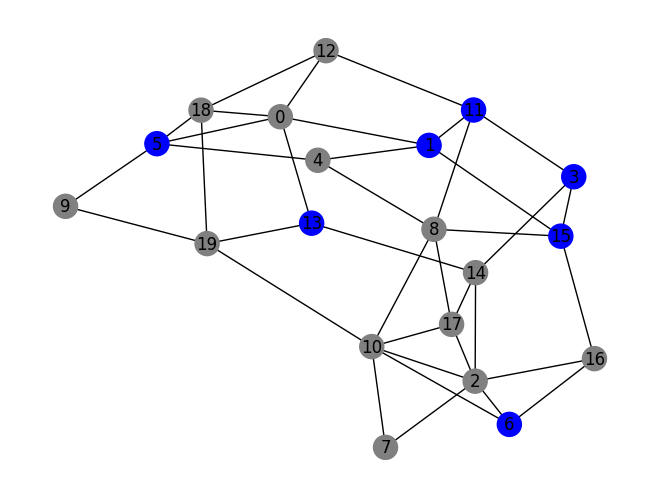

In [32]:
try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in s else 'gray' for n in g_n]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)

In [38]:
import importlib
import graph
importlib.reload(graph)
list(enumerate(graph.covering_potential(incidence_matriz, s)))

[(0, tensor(0.3333)),
 (1, tensor(0.)),
 (2, tensor(0.8333)),
 (3, tensor(0.)),
 (4, tensor(0.1667)),
 (5, tensor(0.)),
 (6, tensor(0.)),
 (7, tensor(0.3333)),
 (8, tensor(0.5000)),
 (9, tensor(0.1667)),
 (10, tensor(0.8333)),
 (11, tensor(0.)),
 (12, tensor(0.3333)),
 (13, tensor(0.)),
 (14, tensor(0.3333)),
 (15, tensor(0.)),
 (16, tensor(0.1667)),
 (17, tensor(0.6667)),
 (18, tensor(0.5000)),
 (19, tensor(0.5000))]

In [39]:
g_n.degree

DegreeView({0: 5, 1: 4, 5: 4, 12: 3, 13: 3, 18: 4, 4: 3, 11: 4, 15: 4, 2: 6, 6: 3, 7: 2, 10: 6, 14: 4, 16: 3, 17: 4, 3: 3, 8: 5, 9: 2, 19: 4})